# Predicting the likeness of a song based on playlist

This is a machine learning project where the playlist from user is used to make prediction if they'll like certain song

In [24]:
# load dependency
import json
import numpy as np
import pandas as pd

In [25]:
# load the data from json
playlists = json.load(open("../playlists_like_dislike.json"))

# load the first playlist data
playlist_index = 0
playlist_uri = playlists[playlist_index]["uri"]
like = playlists[playlist_index]["like"]

In [26]:
# loading a dataset
# this is a large dataset that contains details for tracks that I like and dislike
complete = pd.read_csv("../large_playlist.csv", index_col=0)
print(complete.shape)  # 522 rows, 22 cols
complete.head()

(522, 22)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,Title,first_artist,all_artists,duration_ms,time_signature,like,purpose,num_bars,num_sections,num_segments
0,0.163,0.0363,9,-28.038,1,0.0422,0.971,0.870,0.0937,0.0751,...,Changing Places,Leyton Miller,['Leyton Miller'],176500,4,True,meditation,43,9,449
1,0.290,0.3320,10,-13.058,1,0.0302,0.539,0.967,0.1900,0.0374,...,Message from the Other Lands,Lama House,['Lama House'],221413,4,True,meditation,45,10,537
2,0.326,0.2000,4,-20.150,0,0.0386,0.991,0.943,0.0867,0.4190,...,Nocturno,Henrietta Dubois,['Henrietta Dubois'],129326,4,True,meditation,65,7,403
3,0.361,0.1220,2,-11.416,0,0.0364,0.983,0.820,0.0870,0.2770,...,Older,Lionheart,['Lionheart'],188026,3,True,meditation,87,10,637
4,0.115,0.0664,1,-26.363,1,0.0405,0.958,0.924,0.0817,0.0380,...,Frangibility,Spheres,['Spheres'],201000,4,True,meditation,107,11,655


# Classification and cleaning data

In order to be able to use machine learning later, it's easier to change code the like songs with 1 and the dislike songs with 0.

In [27]:
# encode the like as 1 and dislike as 0
complete["like"] = pd.Categorical(complete["like"])
complete["like_songs"] = complete["like"].cat.codes
complete.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,first_artist,all_artists,duration_ms,time_signature,like,purpose,num_bars,num_sections,num_segments,like_songs
0,0.163,0.0363,9,-28.038,1,0.0422,0.971,0.870,0.0937,0.0751,...,Leyton Miller,['Leyton Miller'],176500,4,True,meditation,43,9,449,1
1,0.290,0.3320,10,-13.058,1,0.0302,0.539,0.967,0.1900,0.0374,...,Lama House,['Lama House'],221413,4,True,meditation,45,10,537,1
2,0.326,0.2000,4,-20.150,0,0.0386,0.991,0.943,0.0867,0.4190,...,Henrietta Dubois,['Henrietta Dubois'],129326,4,True,meditation,65,7,403,1
3,0.361,0.1220,2,-11.416,0,0.0364,0.983,0.820,0.0870,0.2770,...,Lionheart,['Lionheart'],188026,3,True,meditation,87,10,637,1
4,0.115,0.0664,1,-26.363,1,0.0405,0.958,0.924,0.0817,0.0380,...,Spheres,['Spheres'],201000,4,True,meditation,107,11,655,1


In [28]:
# turn the category into numerical
complete["like_songs"].astype("int64")
complete.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,first_artist,all_artists,duration_ms,time_signature,like,purpose,num_bars,num_sections,num_segments,like_songs
0,0.163,0.0363,9,-28.038,1,0.0422,0.971,0.870,0.0937,0.0751,...,Leyton Miller,['Leyton Miller'],176500,4,True,meditation,43,9,449,1
1,0.290,0.3320,10,-13.058,1,0.0302,0.539,0.967,0.1900,0.0374,...,Lama House,['Lama House'],221413,4,True,meditation,45,10,537,1
2,0.326,0.2000,4,-20.150,0,0.0386,0.991,0.943,0.0867,0.4190,...,Henrietta Dubois,['Henrietta Dubois'],129326,4,True,meditation,65,7,403,1
3,0.361,0.1220,2,-11.416,0,0.0364,0.983,0.820,0.0870,0.2770,...,Lionheart,['Lionheart'],188026,3,True,meditation,87,10,637,1
4,0.115,0.0664,1,-26.363,1,0.0405,0.958,0.924,0.0817,0.0380,...,Spheres,['Spheres'],201000,4,True,meditation,107,11,655,1


In [29]:
type(complete["like_songs"][0])

numpy.int8

In [30]:
# the dimension of the df
complete.shape  # 522 rows, 23 cols

(522, 23)

In [31]:
# how many unique values
complete["like_songs"].unique()

array([1, 0], dtype=int8)

In [32]:
# drop duplicates
complete.drop_duplicates()
complete.shape  # there were no duplicates

(522, 23)

In [33]:
# drop columns that are not needed or in string
cols = ["first_artist", "all_artists", "id", "like", "purpose"]
songs = complete.copy()
songs = songs.drop(cols, axis=1)
songs.shape

(522, 18)

In [34]:
# rearrange the columns
columns = ['Title','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'num_bars',
       'num_sections', 'num_segments', 'like_songs']
songs = songs[columns]
songs.head()  # Title are kept because the title needs to be returned as results later

,Title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments,like_songs
0,Changing Places,0.163,0.0363,9,-28.038,1,0.0422,0.971,0.870,0.0937,0.0751,60.027,176500,4,43,9,449,1
1,Message from the Other Lands,0.290,0.3320,10,-13.058,1,0.0302,0.539,0.967,0.1900,0.0374,49.928,221413,4,45,10,537,1
2,Nocturno,0.326,0.2000,4,-20.150,0,0.0386,0.991,0.943,0.0867,0.4190,125.385,129326,4,65,7,403,1
3,Older,0.361,0.1220,2,-11.416,0,0.0364,0.983,0.820,0.0870,0.2770,86.292,188026,3,87,10,637,1
4,Frangibility,0.115,0.0664,1,-26.363,1,0.0405,0.958,0.924,0.0817,0.0380,159.506,201000,4,107,11,655,1


In [35]:
# create another df for prediction
prediction = songs.drop(["Title"], axis=1)
prediction.head()  # now it's all just int

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments,like_songs
0,0.163,0.0363,9,-28.038,1,0.0422,0.971,0.870,0.0937,0.0751,60.027,176500,4,43,9,449,1
1,0.290,0.3320,10,-13.058,1,0.0302,0.539,0.967,0.1900,0.0374,49.928,221413,4,45,10,537,1
2,0.326,0.2000,4,-20.150,0,0.0386,0.991,0.943,0.0867,0.4190,125.385,129326,4,65,7,403,1
3,0.361,0.1220,2,-11.416,0,0.0364,0.983,0.820,0.0870,0.2770,86.292,188026,3,87,10,637,1
4,0.115,0.0664,1,-26.363,1,0.0405,0.958,0.924,0.0817,0.0380,159.506,201000,4,107,11,655,1


# Exploring through visualisation

In [36]:
# load dependencies
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [37]:
songs[songs["like_songs"]==1]["energy"]

0      0.0363
1      0.3320
2      0.2000
3      0.1220
4      0.0664
        ...  
276    0.7160
277    0.7620
278    0.6750
279    0.5450
280    0.9470
Name: energy, Length: 181, dtype: float64

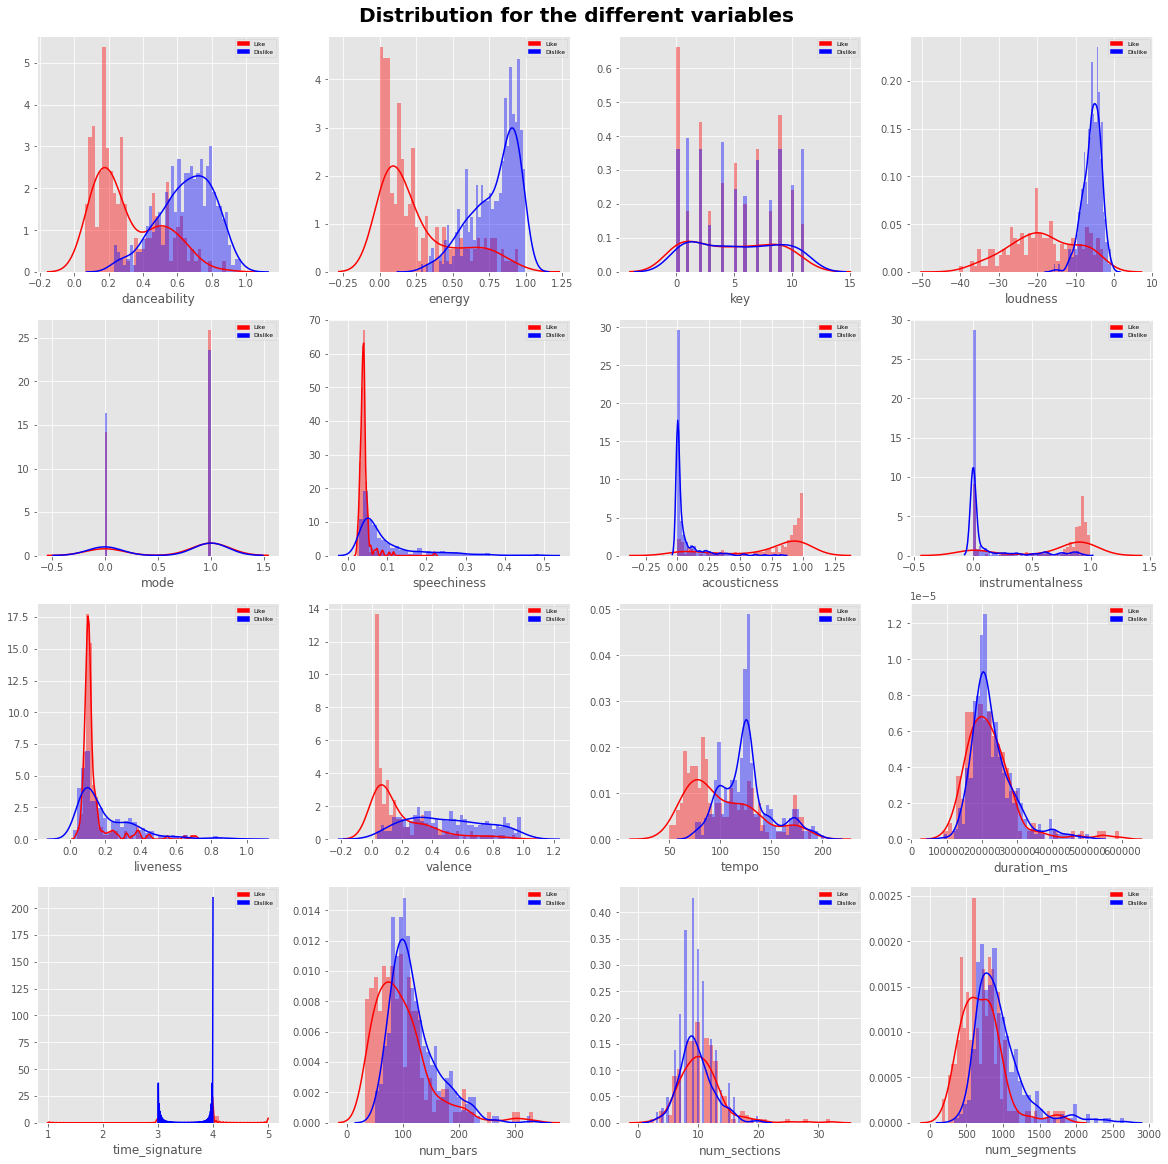

In [38]:
# create a distribution plot
variables = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'num_bars', 'num_sections',
       'num_segments']

# create legend
# set the legend
import matplotlib.patches as patches
red = patches.Patch(color="red", label="Like")
blue = patches.Patch(color="blue", label="Dislike")


f, axes = plt.subplots(4,4, figsize=(20,20))
for ax, features in zip(axes.flat, variables):
    sns.distplot(songs[songs["like_songs"]==1][features],color="red", ax=ax, bins=40)
    sns.distplot(songs[songs["like_songs"]==0][features], color="blue", ax=ax, bins=40)
    ax.legend(handles=[red, blue], loc="upper right", prop={'size': 6})
plt.suptitle("Distribution for the different variables", fontsize=20, y=0.9, fontweight="bold") 
plt.savefig("Distribution_variables_500.png", bbox_inches='tight')

From the distribution of the different variables, it's fairly obvious that the songs I like have rather low scores in terms of danceability, energy, loudness and tempo. Songs that I'm into have rather high scores in instrumentalness and acousticness. I have a suspicion that this might caused by the meditation playlist. It looks like there are not much differences with the tracks that I dislike in terms of duration and sections. I'm hesitant to comment on the differences in tempo, bars and segments as there are quite a large amount of overlap.

# Machine Learning model

## Partitioning data for training and testing

In [39]:
# here all the dataset is used without subsetting
x_train = prediction.drop("like_songs", axis=1)  # for training the model  # x is independent variable, y is dependent variable
y_train = prediction["like_songs"]
x_test = songs.drop(["like_songs", "Title"], axis=1)  # for testing the model
y_test = songs["like_songs"]

In [40]:
x_train.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments
0,0.163,0.0363,9,-28.038,1,0.0422,0.971,0.870,0.0937,0.0751,60.027,176500,4,43,9,449
1,0.290,0.3320,10,-13.058,1,0.0302,0.539,0.967,0.1900,0.0374,49.928,221413,4,45,10,537
2,0.326,0.2000,4,-20.150,0,0.0386,0.991,0.943,0.0867,0.4190,125.385,129326,4,65,7,403
3,0.361,0.1220,2,-11.416,0,0.0364,0.983,0.820,0.0870,0.2770,86.292,188026,3,87,10,637
4,0.115,0.0664,1,-26.363,1,0.0405,0.958,0.924,0.0817,0.0380,159.506,201000,4,107,11,655


In [41]:
y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: like_songs, dtype: int8

## Logistic regression

In [42]:
# load dependencies
from sklearn.metrics import confusion_matrix, classification_report  # this is help to assess the accuracy of the model
from sklearn.linear_model import LogisticRegression

In [43]:
# train
lr_model = LogisticRegression(max_iter=300)  # max_iter was increased to allow convergence
lr_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
# test
lr_pred = lr_model.predict(x_test)
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

[[334   7]
 [ 33 148]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       341
           1       0.95      0.82      0.88       181

    accuracy                           0.92       522
   macro avg       0.93      0.90      0.91       522
weighted avg       0.93      0.92      0.92       522



Precision is the fraction of true positive over total positives. Accuracy is the fraction of samples that were correctly predicted over the total samples. Recall is the fraction of correctly predicted sample over the number of actual samples. F1 is a function of recall and precision. Here, the results show that the model has pretty is pretty good and accurate. However, I am hesitant to draw conclusion because it train and test on the same set of data. It needs to be tested against a different set.

## K-nearest neighbour

In [45]:
# load dependencies
from sklearn.neighbors import KNeighborsClassifier

In [46]:
# knn model
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [47]:
knn_pred = knn_model.predict(x_test)
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

[[302  39]
 [ 91  90]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       341
           1       0.70      0.50      0.58       181

    accuracy                           0.75       522
   macro avg       0.73      0.69      0.70       522
weighted avg       0.74      0.75      0.74       522



The accuracy of Linear Regression model is 0.92 while the accuracy of KNN model is 0.75. As such, we'll be using LR model to predict songs likeness

# Predicting songs

In [48]:
songs["prediction"] = lr_pred
songs.head()

,Title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments,like_songs,prediction
0,Changing Places,0.163,0.0363,9,-28.038,1,0.0422,0.971,0.870,0.0937,0.0751,60.027,176500,4,43,9,449,1,1
1,Message from the Other Lands,0.290,0.3320,10,-13.058,1,0.0302,0.539,0.967,0.1900,0.0374,49.928,221413,4,45,10,537,1,1
2,Nocturno,0.326,0.2000,4,-20.150,0,0.0386,0.991,0.943,0.0867,0.4190,125.385,129326,4,65,7,403,1,1
3,Older,0.361,0.1220,2,-11.416,0,0.0364,0.983,0.820,0.0870,0.2770,86.292,188026,3,87,10,637,1,1
4,Frangibility,0.115,0.0664,1,-26.363,1,0.0405,0.958,0.924,0.0817,0.0380,159.506,201000,4,107,11,655,1,1


In [49]:
songs.sort_values("Title").head()

,Title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments,like_songs,prediction
118,(Rock) Superstar - Edit,0.8070,0.84900,0,-3.039,0,0.2840,0.0263,0.000,0.0766,0.6430,94.091,277280,4,108,11,1258,0,0
68,... Essence Of Kryon,0.0984,0.08040,0,-20.086,1,0.0397,0.9350,0.872,0.1020,0.0379,171.831,546293,3,305,25,1692,1,1
88,5 am,0.1930,0.00985,3,-32.757,1,0.0469,0.8380,0.938,0.1100,0.1230,56.323,159000,3,46,4,430,1,1
74,A New Age,0.1150,0.25000,2,-20.488,1,0.0360,0.9120,0.902,0.0918,0.0335,84.736,215186,1,74,9,645,1,1
514,A'ndia (Original Mix) - TR427,0.7690,0.95600,1,-8.221,0,0.0583,0.0125,0.240,0.1430,0.9610,123.021,280972,4,143,9,1490,0,0


In [50]:
# to see the prediction from LR model
pred_cols = ["Title", "like_songs", "prediction"]
final_pred = songs[pred_cols]
final_pred

,Title,like_songs,prediction
0,Changing Places,1,1
1,Message from the Other Lands,1,1
2,Nocturno,1,1
3,Older,1,1
4,Frangibility,1,1
...,...,...,...
517,Lady (Hear Me Tonight),0,0
518,Tell You No Lie,0,0
519,Can't Get Enough! - Vocal Club Mix,0,0
520,Groovejet,0,0


## Trying to partition the data for model validation

In [51]:
from sklearn.model_selection import train_test_split
x = prediction.drop("like_songs", axis=1)
y = prediction["like_songs"]
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, test_size=0.3, random_state=0)

### Linear regression

In [52]:
from sklearn.metrics import confusion_matrix, classification_report  # this is help to assess the accuracy of the model
from sklearn.linear_model import LogisticRegression

In [53]:
lr_model = LogisticRegression(max_iter = 200)
lr_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
# testing
lr_pred2 = lr_model.predict(x_test)
print(confusion_matrix(y_test, lr_pred2))
print(classification_report(y_test, lr_pred2))

[[103   1]
 [ 10  43]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       104
           1       0.98      0.81      0.89        53

    accuracy                           0.93       157
   macro avg       0.94      0.90      0.92       157
weighted avg       0.93      0.93      0.93       157



### KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [57]:
# predict
knn_pred = knn_model.predict(x_test)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.67      0.79      0.73       104
           1       0.37      0.25      0.30        53

    accuracy                           0.61       157
   macro avg       0.52      0.52      0.51       157
weighted avg       0.57      0.61      0.58       157



After splitting the original data into training and testing, Linear Regression still shows higher accuracy than K-nearest neightbour. 

## Prediction

In [61]:
pred_var = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'num_bars', 'num_sections',
       'num_segments']
lr_pred_final = lr_model.predict(prediction[pred_var])
print(classification_report(prediction["like_songs"], lr_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       341
           1       0.95      0.81      0.88       181

    accuracy                           0.92       522
   macro avg       0.93      0.90      0.91       522
weighted avg       0.92      0.92      0.92       522

